In [8]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
import os
import sys
sys.path.append('C:/Users/csltwu/Documents/Python Scripts/ML Project')

In [22]:
#print relative frequency by target and catogory class
def var_freq_target (df, target, feature, save = False):   
    feature = feature
    target = target
    category = np.sort(df[feature].unique())
    target_class = np.sort(df[target].unique())
    dimension = len(category)*len(target_class) #total rows
    # initialize summary table
    df_graph = pd.DataFrame({feature:np.zeros(dimension), 'frequency': np.zeros(dimension), 'target': np.zeros(dimension)})
    count = 0
    for i in target_class:
        class_sum = sum(df[target] == i)
        for j in category:
            df_graph.iloc[count]['target'] = i
            df_graph.iloc[count][feature] = j
            category_sum = sum((df[target] == i) & (df[feature] == j))
            df_graph.iloc[count]['frequency'] = category_sum / class_sum
            count += 1
    df_graph['class'] = np.where(df_graph['target'] == 1, target, 'Non' + target)
    fig, ax = plt.subplots(figsize=(12, 6))
    palette =["Orange", "Red", "Green", "Black", "Grey"] # support up to 5 targets color
    if len(target_class) <= 5:
        sns.barplot(ax = ax, x = feature, y ='frequency', hue = 'class', data = df_graph, palette=palette[:len(target_class)])
    else:
        sns.barplot(ax = ax, x = feature, y ='frequency', hue = 'class', data = df_graph)
    # save to pdf file
    if save == True:
        fig1 = plt.gcf()
        pdf.savefig(fig1)
    return df_graph

In [46]:
# to easily print bold and colored font
# from https://stackoverflow.com/questions/287871/how-to-print-colored-text-in-terminal-in-python
class font:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Step 1: Input Data

In [9]:
df = pd.read_csv("../titanic.csv")    
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Convert Sex Category from male/female to 1/0

In [10]:
df['Male'] = np.where(df['Sex'] == 'male', 1, 0)
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Male
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1


## Step 2: Data Exploratory Analysis

Before the analysis, we first define our target and input features' names

In [146]:
target = 'Survived'
feature_list = ['Pclass', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare', 'Male']

### 2.1 Summary Statistics and Missing Rate

In [12]:
df_summary = pd.DataFrame(df.describe().T)
print(df_summary)

                         count       mean        std   min     25%      50%  \
Survived                 887.0   0.385569   0.487004  0.00   0.000   0.0000   
Pclass                   887.0   2.305524   0.836662  1.00   2.000   3.0000   
Age                      887.0  29.471443  14.121908  0.42  20.250  28.0000   
Siblings/Spouses Aboard  887.0   0.525366   1.104669  0.00   0.000   0.0000   
Parents/Children Aboard  887.0   0.383315   0.807466  0.00   0.000   0.0000   
Fare                     887.0  32.305420  49.782040  0.00   7.925  14.4542   
Male                     887.0   0.645998   0.478480  0.00   0.000   1.0000   

                             75%       max  
Survived                  1.0000    1.0000  
Pclass                    3.0000    3.0000  
Age                      38.0000   80.0000  
Siblings/Spouses Aboard   1.0000    8.0000  
Parents/Children Aboard   0.0000    6.0000  
Fare                     31.1375  512.3292  
Male                      1.0000    1.0000  


In [13]:
miss = pd.DataFrame(len(df.index) - df.count())
miss['Total'] = df.shape[0]
miss.columns = ['Miss', 'Total']         
miss['Miss %'] = miss['Miss'] / miss['Total']
miss['NonMiss %'] = 1 - miss['Miss %']
print(miss)

                         Miss  Total  Miss %  NonMiss %
Survived                    0    887     0.0        1.0
Pclass                      0    887     0.0        1.0
Name                        0    887     0.0        1.0
Sex                         0    887     0.0        1.0
Age                         0    887     0.0        1.0
Siblings/Spouses Aboard     0    887     0.0        1.0
Parents/Children Aboard     0    887     0.0        1.0
Fare                        0    887     0.0        1.0
Male                        0    887     0.0        1.0


### 2.2 Target Histogram & Correlation Heat Map

(array([545.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

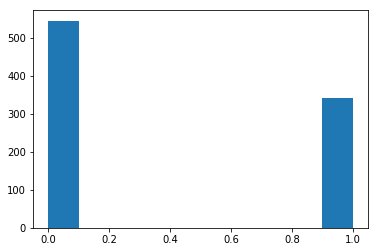

In [20]:
plt.hist(df[target])

<Figure size 432x288 with 0 Axes>

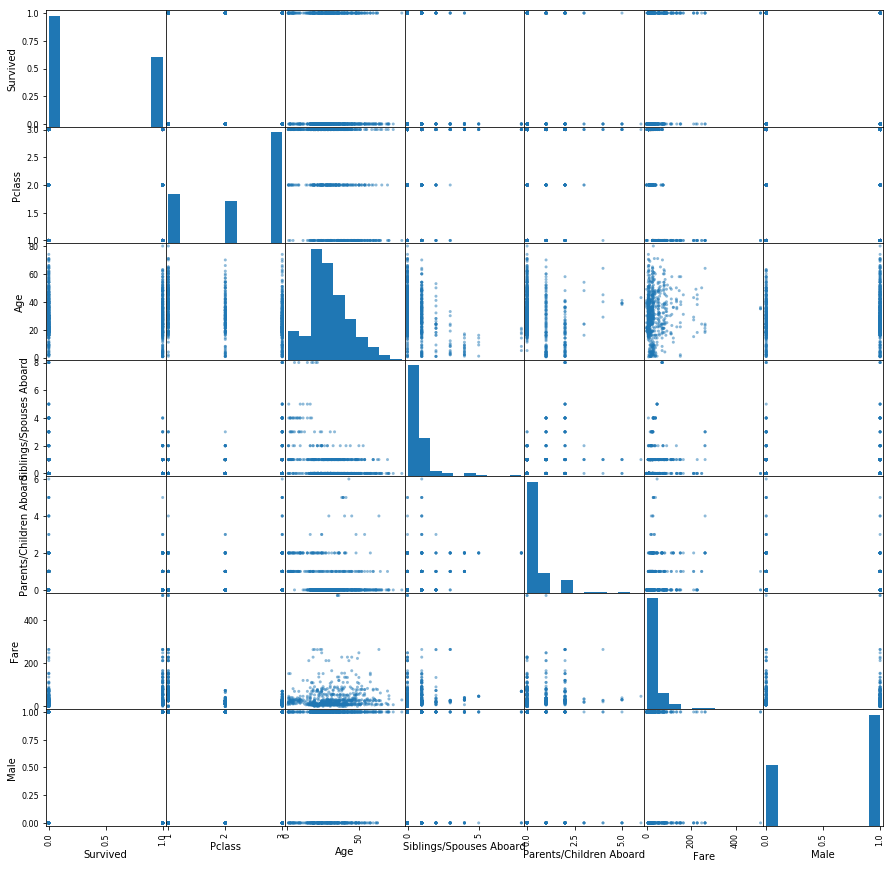

<Figure size 432x288 with 0 Axes>

In [80]:
#Multivariate Plots
pd.plotting.scatter_matrix(df, figsize=(15,15))
plt.figure()

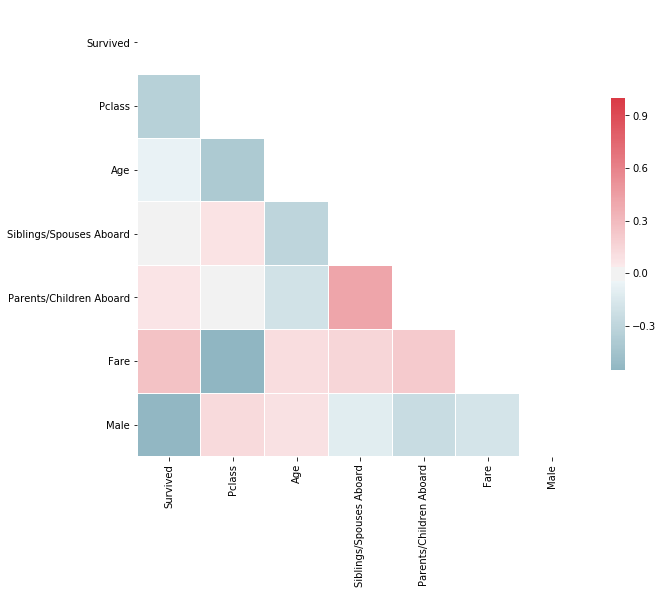

In [82]:
corr_matrix = df.corr()
mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, ax = ax, mask = mask, cmap = cmap, center = 0,
            square = True, linewidths = .1, cbar_kws = {"shrink": .5})

It is not surprices to see children aboard is highly related to siblings aboard 

### 2.3 Compare feature distribution for Survival and Non-survival group

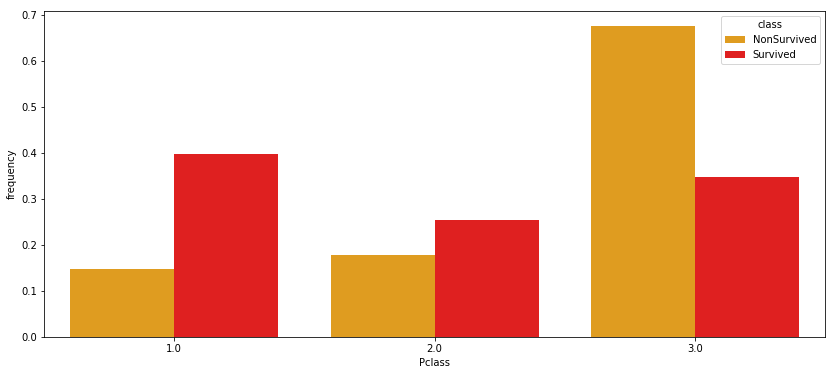

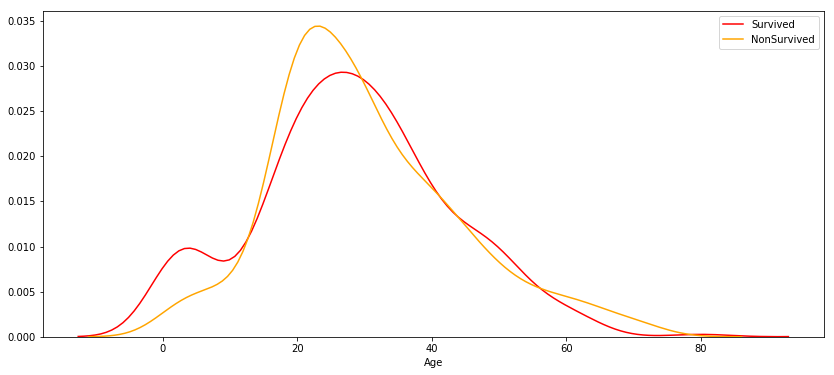

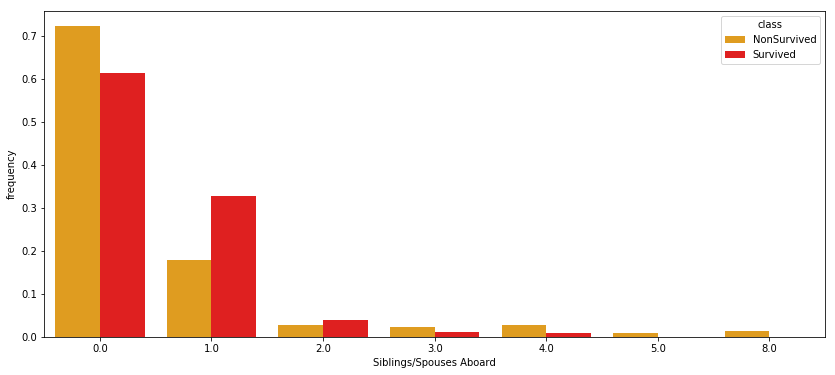

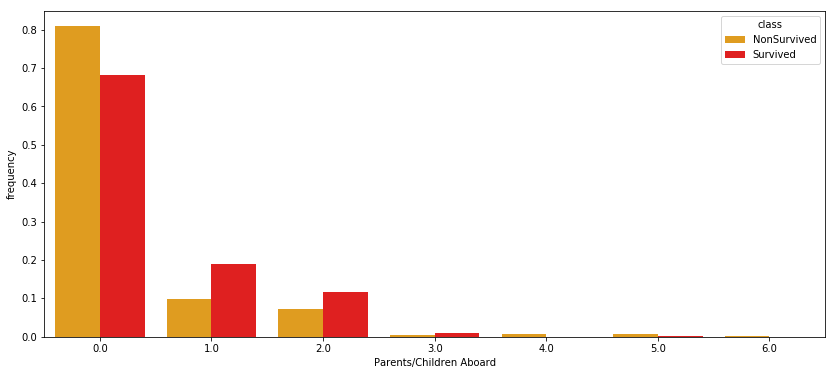

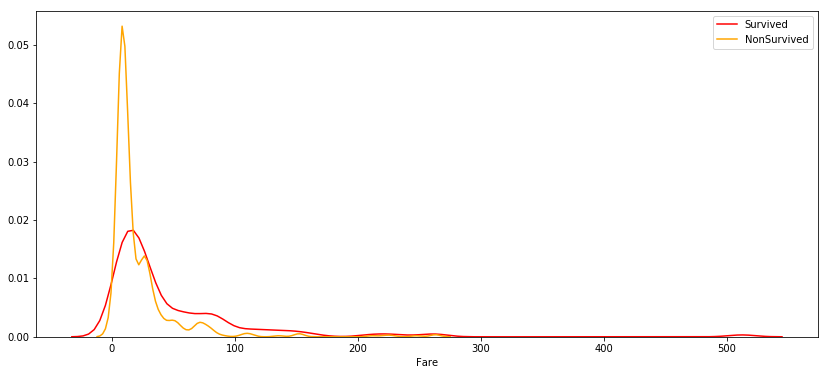

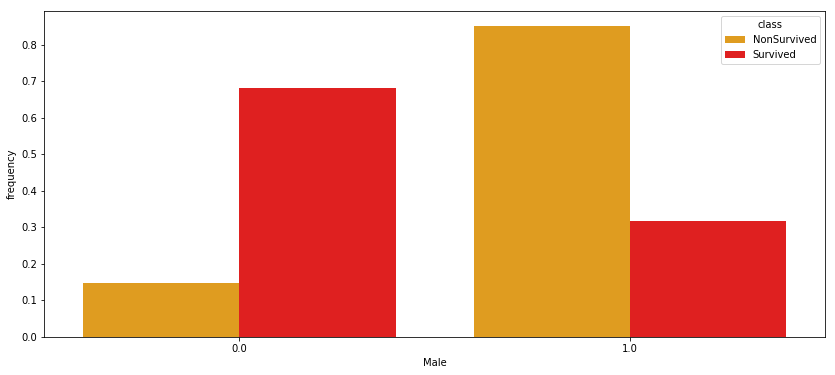

In [29]:
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("../var_target.pdf")
t0 = df.loc[df[target] == 0]
t1 = df.loc[df[target] == 1]
for n in range(len(feature_list)):
    # check if the feature is catogorical or continuous
    if len(df[feature_list[n]].unique()) <= 10:
        var_freq_target(df = df, target = target, feature = feature_list[n], save = True)
    else:
        fig, ax = plt.subplots(figsize=(12, 6))
        sns.distplot(t1[feature_list[n]], color="Red", ax = ax, hist = False, norm_hist=True, label = target)
        sns.distplot(t0[feature_list[n]], color="Orange", ax = ax, hist = False, norm_hist=True, label = 'Non' + target)
        fig1 = plt.gcf()
        pdf.savefig(fig1)    
pdf.close()

## Step 3: Data Prepare for Model 
<br> This step includes:
<br> 1) train/dev/test split 
<br> 2) Standardization
<br> 3) data under/over sampling

In [156]:
# Load library, dataset and set random seed
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
random_seed = 3154 
X = df[feature_list]
y = df[target]

### 3.1 Catogorical Variable Encoding
<br> Create Indicator for categorical variables. This is not necessary for tree based model, but necessary for linear-based model, such as logistic regression and neural network.

In [157]:
feature_list_categorical = ['Pclass']
X = pd.get_dummies(X, columns = feature_list_categorical)
X = X.drop(columns = 'Pclass_3', axis = 1) # drop one to prevent multicolinearity
feature_list_new = X.columns
X.head()

,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Male,Pclass_1,Pclass_2
0,22.0,1,0,7.2500,1,0,0
1,38.0,1,0,71.2833,0,1,0
2,26.0,0,0,7.9250,0,0,0
3,35.0,1,0,53.1000,0,1,0
4,35.0,0,0,8.0500,1,0,0


### 3.2 train/dev/test split 
<br> Dev is used for hyperparameter and prediction threshold. If we use cross-validation, then Dev is not required.

In [158]:
train_rate = 0.9
dev_rate = 0.05
test_rate = 1 - train_rate - dev_rate

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= (dev_rate + test_rate), random_state = random_seed)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size = dev_rate / (dev_rate + test_rate),random_state = random_seed)
print('X_train shape:', X_train.shape, 'y_train shape:', y_train.shape)
print('y_dev shape:', X_dev.shape, 'y_dev shape:', y_dev.shape)
print('X_test shape:', X_test.shape, 'y_test shape:', y_test.shape)

X_train shape: (798, 7) y_train shape: (798,)
y_dev shape: (44, 7) y_dev shape: (44,)
X_test shape: (45, 7) y_test shape: (45,)


### 3.2 Standardization
<br> Note 1: Standardization should all on Train Set
<br> Note 2: For categorical variable, we might not want to standardize them. Although standardization will not hurt the model prediction, it certainly makes interpretation a little bit harder. For example, 0/1 varaible can become -0.3/0.7 after the standardization.
<br> There are two popular ways to standardize the input features: 
<br> 1. Use the mean and min value, so the variable will be in the range of [0,1]
<br> 2. Substract mean and divided by std, so the variable will have mean 0 and variance 1

3.2.1 Let's use own function to do mean and variance standardization

In [160]:
X_train_standard = X_train.copy()
X_dev_standard = X_dev.copy()
X_test_standard = X_test.copy()
feature_list_continuous = ['Age', 'Fare']
for i in feature_list_continuous:
    train_mean = X_train[i].mean(axis = 0)
    train_std = X_train[i].std(axis = 0)
    X_train_standard[i] = (X_train_standard[i] -  train_mean) / train_std
    X_dev_standard[i] = (X_dev_standard[i] -  train_mean) / train_std
    X_test_standard[i] = (X_test_standard[i] -  train_mean) / train_std
print(font.BOLD + 'Before Standardized:' + font.END + '\n', X_train[feature_list_continuous].describe())
print(font.BOLD +'After  Standardized:' + font.END + '\n', X_train_standard[feature_list_continuous].describe())

Before Standardized:
               Age        Fare
count  798.000000  798.000000
mean    29.493421   32.312927
std     14.088718   49.504369
min      0.420000    0.000000
25%     21.000000    7.925000
50%     28.000000   14.500000
75%     38.000000   31.275000
max     80.000000  512.329200
After  Standardized:
                 Age          Fare
count  7.980000e+02  7.980000e+02
mean   5.982405e-17  1.249905e-15
std    1.000000e+00  1.000000e+00
min   -2.063596e+00 -6.527288e-01
25%   -6.028527e-01 -4.926419e-01
50%   -1.060012e-01 -3.598254e-01
75%    6.037866e-01 -2.096638e-02
max    3.584895e+00  9.696443e+00


3.2.2 We use a library to do the standardization
<br> The library can not do standardization for only categorical variabls
<br> Also, the output is numpy array, so we need to convert back to pandas
<br> Results are slightly different, but both are very close to mean 0 and variance 1

In [161]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)
X_train_standard2 = pd.DataFrame(scaler.transform(X_train), columns = feature_list_new)
X_dev_standard2 = pd.DataFrame(scaler.transform(X_train), columns = feature_list_new)
X_test_standard2 = pd.DataFrame(scaler.transform(X_train), columns = feature_list_new)
print(font.BOLD + 'Before Standardized:' + font.END + '\n', X_train[feature_list_continuous].describe())
print(font.BOLD +'After  Standardized:' + font.END + '\n', X_train_standard2[feature_list_continuous].describe())

Before Standardized:
               Age        Fare
count  798.000000  798.000000
mean    29.493421   32.312927
std     14.088718   49.504369
min      0.420000    0.000000
25%     21.000000    7.925000
50%     28.000000   14.500000
75%     38.000000   31.275000
max     80.000000  512.329200
After  Standardized:
                 Age          Fare
count  7.980000e+02  7.980000e+02
mean   4.591148e-17 -4.424197e-17
std    1.000627e+00  1.000627e+00
min   -2.064890e+00 -6.531382e-01
25%   -6.032308e-01 -4.929509e-01
50%   -1.060677e-01 -3.600510e-01
75%    6.041653e-01 -2.097953e-02
max    3.587144e+00  9.702524e+00


### 3.3 Under/Over Sampling
<br> If the dataset is highly unbalanced (e.g. fraud), then we need to apply under/over sampling. However, in Titanic cased, the data are quite balanced, so we might not want to do that.

In [162]:
sampler = RandomUnderSampler(random_state = random_seed)
X_train_standard_resampled, y_resampled = sampler.fit_sample(X_train_standard, y_train)
print(font.BOLD + 'Before Undersampling:' + font.END + '\n' + 'X_train_standard.shape', X_train_standard.shape,
      target +":", sum(y_train == 1), 'Non' + target +":", sum(y_train == 0))
print(font.BOLD + 'After Undersampling:' + font.END + '\n' + 'X_train_standard.shape', 
      X_train_standard_resampled.shape,  
      target +":", sum(y_resampled == 1), 'Non' + target +":", sum(y_resampled == 0))

Before Undersampling:
X_train_standard.shape (798, 7) Survived: 307 NonSurvived: 491
After Undersampling:
X_train_standard.shape (614, 7) Survived: 307 NonSurvived: 307


In [163]:
# ratio = 1 means we have equal sample size for target = 0 and taregt = 1
sm = SMOTE(random_state = random_seed, ratio = 1)
X_train_standard_smote, y_smote = sm.fit_sample(X_train_standard, y_train)
print(font.BOLD + 'Before Undersampling:' + font.END + '\n' + 'X_train_standard.shape', X_train_standard.shape,
      target +":", sum(y_train == 1), 'Non' + target +":", sum(y_train == 0))
print(font.BOLD + 'After Undersampling:' + font.END + '\n' + 'X_train_standard.shape', 
      X_train_standard_smote.shape,  
      target +":", sum(y_smote == 1), 'Non' + target +":", sum(y_smote == 0))

Before Undersampling:
X_train_standard.shape (798, 7) Survived: 307 NonSurvived: 491
After Undersampling:
X_train_standard.shape (982, 7) Survived: 491 NonSurvived: 491


## Step 4: Modling
### In this step, we use a lot of statistics and machine learning models. 
### For each model, we follow four steps:
#### 1. Tune hyperparameter
#### 2. Train the model and make prediction. 
#### 3. If the predicted output is probability, then threshold is optimized to generage highest accuracy. Based on the optimal threshold, class is predicted.
#### 4. Show performance on train, dev and test datasets

In [164]:
# import some evaluation matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [173]:
def score_predictions(predicted_proba, threshold, true_labels):
    pred_labels = (predicted_proba > threshold) * 1

    truePos, falsePos, trueNeg, falseNeg = 0.0, 0.0, 0.0, 0.0
    for predLabel, trueLabel in zip(pred_labels, true_labels):
        if predLabel == 1:
            if trueLabel == 1:
                truePos += 1
            else:
                falsePos += 1
        else:
            if trueLabel == 1:
                falseNeg += 1
            else:
                trueNeg += 1
    return truePos, falsePos, trueNeg, falseNeg

In [165]:
def prediction_performance(y_true, y_predict):
    # Accuracy score
    print('accuracy is', accuracy_score(y_predict, y_true))
    print('Confusion Matrix: \n', confusion_matrix(y_true, y_predict))
    print(classification_report(y_predict, y_true))

In [177]:
def best_threshold(y_dev_pred_prob, y_dev):
    p_best = 0.5
    accuracy_best = 0
    for p in np.arange(0.0, 1.0005, 0.001):
        tp, fp, tn, fn = score_predictions(y_dev_pred_prob, p, y_dev)
        accuracy = (tp + tn) / (tp + fp + tn + fn)
        if accuracy > accuracy_best:
            p_best, accuracy_best = p, accuracy
    return p_best, accuracy_best

In [166]:
# Let's use the standardized train, dev and test without under/over sampling
X_train = X_train_standard.copy()
X_dev = X_dev_standard.copy()
X_test = X_test_standard.copy()
print('Train:', X_train.shape)
print('Dev:', X_dev.shape)
print('Test:', X_test.shape)

Train: (798, 7)
Dev: (44, 7)
Test: (45, 7)


### 4.1 Logistic Regression
We start with the classic statistics model

In [168]:
import statsmodels.api as sm
logistic_model = sm.Logit(y_train, X_train)
logistic_model = logistic_model.fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.437821
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  798
Model:                          Logit   Df Residuals:                      791
Method:                           MLE   Df Model:                            6
Date:                Wed, 01 May 2019   Pseudo R-squ.:                  0.3429
Time:                        16:38:53   Log-Likelihood:                -349.38
converged:                       True   LL-Null:                       -531.73
                                        LLR p-value:                 1.081e-75
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                        -0.6294      0.115     -5.491      0.000      -0.854   

In [178]:
y_train_pred_prob = logistic_model.predict(X_train)
y_dev_pred_prob = logistic_model.predict(X_dev)
y_test_pred_prob = logistic_model.predict(X_test)
# Decide best threshold cutoff
p_best, accuracy_best = best_threshold(y_dev_pred_prob, y_dev)
y_train_pred = np.where(y_train_pred_prob > p_best, 1, 0)
y_dev_pred = np.where(y_dev_pred_prob > p_best, 1, 0)
y_test_pred = np.where(y_test_pred_prob > p_best, 1, 0)
print('Best Threshold:', p_best, 'Accuracy:', accuracy_best)

Best Threshold: 0.263 Accuracy: 0.7954545454545454


In [179]:
print(font.BOLD + 'Train:' + font.END)
prediction_performance(y_train, y_train_pred)
print(font.BOLD + 'Dev:' + font.END)
prediction_performance(y_dev, y_dev_pred)
print(font.BOLD + 'Test' + font.END)
prediction_performance(y_test, y_test_pred)

Train:
accuracy is 0.7468671679197995
Confusion Matrix: 
 [[338 153]
 [ 49 258]]
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       387
           1       0.84      0.63      0.72       411

   micro avg       0.75      0.75      0.75       798
   macro avg       0.76      0.75      0.74       798
weighted avg       0.77      0.75      0.74       798

Dev:
accuracy is 0.7954545454545454
Confusion Matrix: 
 [[21  4]
 [ 5 14]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.74      0.78      0.76        18

   micro avg       0.80      0.80      0.80        44
   macro avg       0.79      0.79      0.79        44
weighted avg       0.80      0.80      0.80        44

Test
accuracy is 0.7333333333333333
Confusion Matrix: 
 [[20  9]
 [ 3 13]]
              precision    recall  f1-score   support

           0       0.69      0.87      0.77        23
      

### 4.2 KNN
<br> In pattern recognition, the k-nearest neighbors algorithm (k-NN)
 is a non-parametric method used for classification and regression. In both cases, 
 the input consists of the k closest training examples in the feature space. The output is voted by all
 the input data within the same group (cluster).

In [112]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize Parameters
n_neighbors_best = 0
accuracy_best = 0
# Tune Parameter based on Highest Dev Accuracy
for n_neighbors in range(2, 20):
    Model = KNeighborsClassifier(n_neighbors = n_neighbors)
    Model.fit(X_train, y_train)
    y_dev_pred = Model.predict(X_dev)
    if accuracy_score(y_dev_pred, y_dev) > accuracy_best:
        n_neighbors_best, accuracy_best = n_neighbors, accuracy_score(y_dev_pred, y_dev)
print('Best N Neighbors:', n_neighbors_best)

Best N Neighbors: 9


In [98]:
KNN_Model = KNeighborsClassifier(n_neighbors = n_neighbors_best)
KNN_Model.fit(X_train, y_train)
y_train_pred = Model.predict(X_train)
y_dev_pred = Model.predict(X_dev)
y_test_pred = Model.predict(X_test)

In [108]:
print(font.BOLD + 'Train:' + font.END)
prediction_performance(y_train, y_train_pred)
print(font.BOLD + 'Dev:' + font.END)
prediction_performance(y_dev, y_dev_pred)
print(font.BOLD + 'Test' + font.END)
prediction_performance(y_test, y_test_pred)

Train:
accuracy is 0.8270676691729323
Confusion Matrix: 
 [[424  67]
 [ 71 236]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       495
           1       0.77      0.78      0.77       303

   micro avg       0.83      0.83      0.83       798
   macro avg       0.82      0.82      0.82       798
weighted avg       0.83      0.83      0.83       798

Dev:
accuracy is 0.75
Confusion Matrix: 
 [[21  4]
 [ 7 12]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.63      0.75      0.69        16

   micro avg       0.75      0.75      0.75        44
   macro avg       0.74      0.75      0.74        44
weighted avg       0.76      0.75      0.75        44

Test
accuracy is 0.7777777777777778
Confusion Matrix: 
 [[24  5]
 [ 5 11]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0

## 4.3 Radius Neighbors Classifier
Classifier implements a vote among neighbors within a given radius
<br>In scikit-learn RadiusNeighborsClassifier is very similar to KNeighborsClassifier with the exception 
of two parameters. First, in RadiusNeighborsClassifier we need to specify the radius of the fixed area
 used to determine if an observation is a neighbor using radius. Unless there is some substantive reason
 for setting radius to some value, it is best to treat it like any other hyperparameter and tune it during
 model selection. The second useful parameter is outlier_label, which indicates what label to give an 
 observation that has no observations within the radius - which itself can often be a useful tool for 
 identifying outliers.

In [114]:
from sklearn.neighbors import RadiusNeighborsClassifier
# Initialize Parameters
radius_best = 0
accuracy_best = 0
# Tune Parameter based on Highest Dev Accuracy
for radius in range(2, 20):
    Model = RadiusNeighborsClassifier(radius = radius)
    Model.fit(X_train, y_train)
    y_dev_pred = Model.predict(X_dev)
    if accuracy_score(y_dev_pred, y_dev) > accuracy_best:
        radius_best, accuracy_best = radius, accuracy_score(y_dev_pred, y_dev)
print('Best Radius:', radius_best)

Best Radius: 2


In [119]:
RN_Model = RadiusNeighborsClassifier(radius = radius_best)
RN_Model.fit(X_train, y_train)
y_train_pred = Model.predict(X_train)
y_dev_pred = Model.predict(X_dev)
y_test_pred = Model.predict(X_test)

In [120]:
print(font.BOLD + 'Train:' + font.END)
prediction_performance(y_train, y_train_pred)
print(font.BOLD + 'Dev:' + font.END)
prediction_performance(y_dev, y_dev_pred)
print(font.BOLD + 'Test' + font.END)
prediction_performance(y_test, y_test_pred)

Train:
accuracy is 0.6152882205513784
Confusion Matrix: 
 [[491   0]
 [307   0]]
              precision    recall  f1-score   support

           0       1.00      0.62      0.76       798
           1       0.00      0.00      0.00         0

   micro avg       0.62      0.62      0.62       798
   macro avg       0.50      0.31      0.38       798
weighted avg       1.00      0.62      0.76       798

Dev:
accuracy is 0.5681818181818182
Confusion Matrix: 
 [[25  0]
 [19  0]]
              precision    recall  f1-score   support

           0       1.00      0.57      0.72        44
           1       0.00      0.00      0.00         0

   micro avg       0.57      0.57      0.57        44
   macro avg       0.50      0.28      0.36        44
weighted avg       1.00      0.57      0.72        44

Test
accuracy is 0.6444444444444445
Confusion Matrix: 
 [[29  0]
 [16  0]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        45
      